In [293]:
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.seasonal import STL
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.api import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt


%matplotlib inline


In [294]:
start='2018-01-01'
end='2018-01-31'
order = (1,0,0)
seasonal_order = (1,0,0,5)

In [295]:
revenue_all = pd.read_csv('../data/ingest/revenue-all.csv',header=0, index_col=0,parse_dates=['date'],usecols=["date", "revenue"])
df=revenue_all.reset_index()[['date','revenue']].set_index('date').resample('D').sum()
data = df[(df.index>= start) & (df.index<= end) ]

In [ ]:
arima_model = ARIMA(df, order=order)
arima_fit = arima_model.fit()
sarimax_model = SARIMAX(df, order=order, seasonal_order=seasonal_order)
sarimax_fit = sarima_model.fit()

In [297]:
arima_predict = arima_fit.predict(start=start, end=end)
sarimax_predict = sarimax_fit.predict(start=start, end=end)

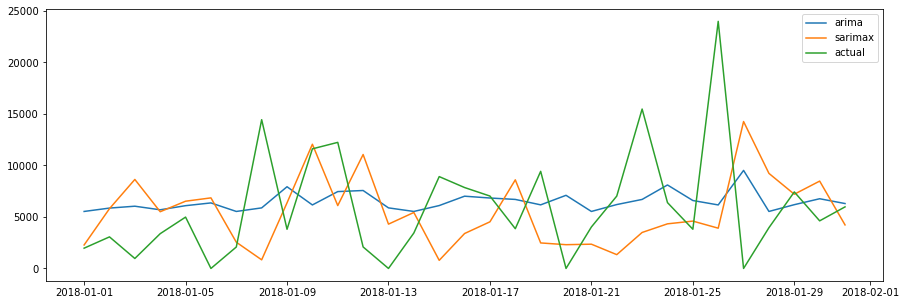

In [298]:
plt.figure(figsize=(15,5))
plt.plot(arima_predict)
plt.plot(sarimax_predict)
plt.plot(data)
plt.legend(['arima','sarimax','actual'])

In [299]:
print(f"actual: {data.sum()}, arima: {arima_predict.sum()}, sarimax: {sarimax_predict.sum()}")


actual: revenue    183680.394
dtype: float64, arima: 200900.91710568563, sarimax: 169688.55498709166


In [300]:
arima_rmse = sqrt(mean_squared_error(data, arima_predict))
sarimax_rmse = sqrt(mean_squared_error(data, sarimax_predict))

print(f"ARIMA RMSE: {arima_rmse}, SARIMAX RMSE: {sarimax_rmse}")

ARIMA RMSE: 5390.626104676751, SARIMAX RMSE: 6850.576263172902
